In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea

In [2]:
df = pd.read_csv(r'C:\Users\user\Downloads\C6_bmi.csv')
df

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3
...,...,...,...,...
495,Female,150,153,5
496,Female,184,121,4
497,Female,141,136,5
498,Male,150,95,5


In [3]:
df['Gender'].value_counts()

Female    255
Male      245
Name: Gender, dtype: int64

In [4]:
x = df.drop('Gender',axis=1)
y=df['Gender']

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
 3   Index   500 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 15.8+ KB


In [6]:
df.columns

Index(['Gender', 'Height', 'Weight', 'Index'], dtype='object')

In [7]:
df1 = df[['Gender', 'Height', 'Weight', 'Index']]
df1

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3
...,...,...,...,...
495,Female,150,153,5
496,Female,184,121,4
497,Female,141,136,5
498,Male,150,95,5


In [8]:
df1.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
 3   Index   500 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 15.8+ KB


In [9]:
df2 = df1.fillna(0)

In [10]:
x = df2[['Height', 'Weight', 'Index']]
y = df2['Gender']

In [11]:
g1 = {"Gender":{'Male':1,'Female':2}}
df2= df2.replace(g1)
print(df2)

     Gender  Height  Weight  Index
0         1     174      96      4
1         1     189      87      2
2         2     185     110      4
3         2     195     104      3
4         1     149      61      3
..      ...     ...     ...    ...
495       2     150     153      5
496       2     184     121      4
497       2     141     136      5
498       1     150      95      5
499       1     173     131      5

[500 rows x 4 columns]


In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.70)

In [14]:
from sklearn.ensemble import RandomForestClassifier

In [15]:
y_train.shape

(350,)

In [16]:
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [17]:
parameters = {
    'max_depth':[13,24,53,64,25],
    'min_samples_leaf':[35,16,75,70,45],
    'n_estimators':[10,20,30,40,50]
}

In [18]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid_search = GridSearchCV(estimator=rfc,param_grid=parameters,cv=2,scoring='accuracy')
grid_search.fit(x_train,y_train)

In [ ]:
grid_search.best_score_

In [ ]:
from sklearn.tree import plot_tree

In [24]:
rfc_best= grid_search.best_estimator_

[Text(2232.0, 2053.6, 'BMI <= 27.35\ngini = 0.454\nsamples = 336\nvalue = [350, 187]\nclass = Yes'),
 Text(1275.4285714285713, 1812.0, 'Age <= 41.0\ngini = 0.138\nsamples = 92\nvalue = [136, 11]\nclass = Yes'),
 Text(956.5714285714284, 1570.4, 'BloodPressure <= 73.0\ngini = 0.048\nsamples = 76\nvalue = [118, 3]\nclass = Yes'),
 Text(637.7142857142857, 1328.8, 'Age <= 27.5\ngini = 0.023\nsamples = 57\nvalue = [86, 1]\nclass = Yes'),
 Text(318.85714285714283, 1087.2, 'gini = 0.0\nsamples = 41\nvalue = [62, 0]\nclass = Yes'),
 Text(956.5714285714284, 1087.2, 'gini = 0.077\nsamples = 16\nvalue = [24, 1]\nclass = Yes'),
 Text(1275.4285714285713, 1328.8, 'gini = 0.111\nsamples = 19\nvalue = [32, 2]\nclass = Yes'),
 Text(1594.2857142857142, 1570.4, 'gini = 0.426\nsamples = 16\nvalue = [18, 8]\nclass = Yes'),
 Text(3188.5714285714284, 1812.0, 'BMI <= 40.85\ngini = 0.495\nsamples = 244\nvalue = [214, 176]\nclass = Yes'),
 Text(2550.8571428571427, 1570.4, 'DiabetesPedigreeFunction <= 0.815\ngini

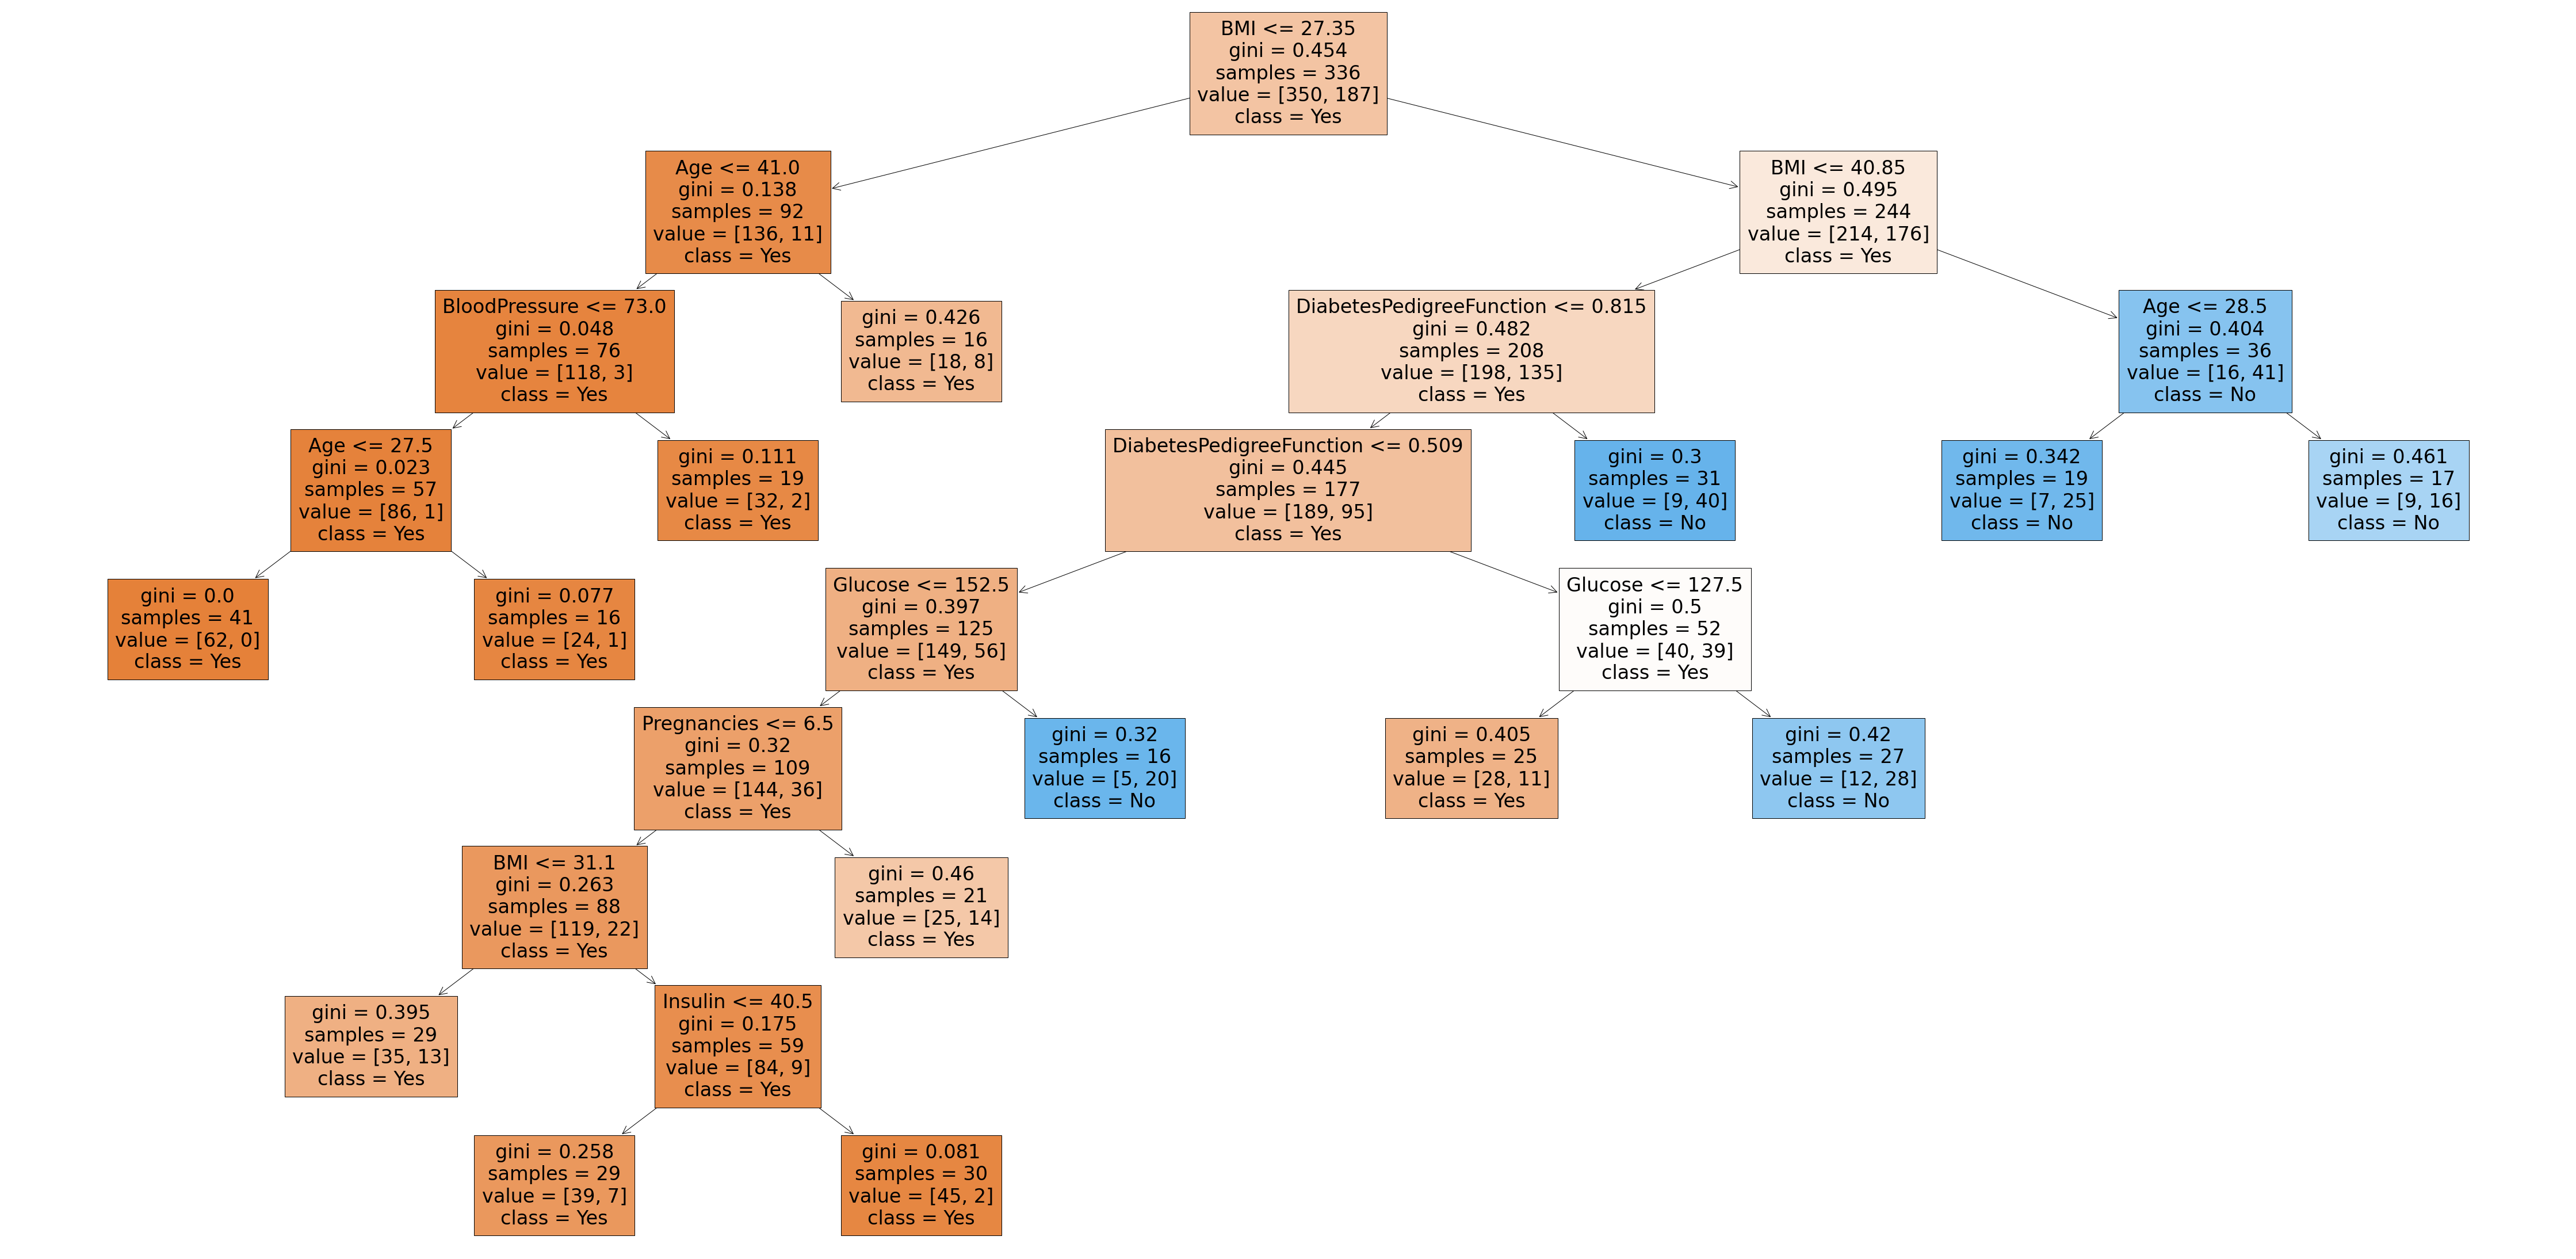

In [25]:
plt.figure(figsize=(80,40))
plot_tree(rfc_best.estimators_[5],feature_names=x.columns,class_names=["Yes","No"],filled=True)